# This jupyter notebook is used to do data wrangling for capstone 1 


**Dataset for S&P500 index from 01-01-2000 to 05-20-2020 has been download from Yahoo Finance:**

- "sp500_index_data_01-01-2000_05-20-2020.csv"

**Dataset for S&P500 composites from 01-01-2005 to 12-31-2019 has been download and combined from Yahoo Finance:**
- Adj Close: "sp500_all_download_data_01-01-2005_12-31-2019_Adj Close.csv"
- Adj Open : "sp500_all_download_data_01-01-2005_12-31-2019_Adj Open.csv"
- Volume : "sp500_all_download_data_01-01-2005_12-31-2019_Volume.csv"

**Daily Indicators (binary 1: "in", 0: "not in") for if a stock in the S&P500 index:**
- "sp500_matrix_utd.csv"

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os 
import pandas as pd
from datetime import datetime,date
from calendar import monthrange
import numpy as np
import math
from matplotlib import style
import matplotlib.pyplot as plt
from random import sample
%matplotlib inline
os.getcwd()

'G:\\Data\\Machine_Learning_Library\\spring_board_data_science\\Capstone\\Capstone1\\src'

### Load all files

In [2]:
prefix_market = 'sp500'
#prefix_market = 'FTSE100'
base_os = 'G:\Data\Machine_Learning_Library\spring_board_data_science\Capstone\Capstone1\data'
#os1 = os.path.join(base_os, prefix_market,'cleaned_data')
#os2 = os.path.join(base_os, prefix_market,'download_data_revise')
start_date = '2005-01-01'
end_date = '2020-01-01'
##load all data
filename = prefix_market + "_matrix_utd.csv"
origdat_matrix = pd.read_csv(os.path.join(base_os,filename),sep=",",index_col='symbol')
origdat_matrix.columns = origdat_matrix.columns.astype('datetime64[ns]')
print("The size of \"{}\" is: {}".format(filename, origdat_matrix.shape))

filename = prefix_market + "_all_download_data_01-01-2005_12-31-2019_Adj Close.csv"
origdat = pd.read_csv(os.path.join(base_os,filename),sep=",",index_col='date',parse_dates = True)
print("The size of \"{}\" is: {}".format(filename, origdat.shape))

filename = prefix_market + "_all_download_data_01-01-2005_12-31-2019_Adj Open.csv"
origdat_o = pd.read_csv(os.path.join(base_os,filename),sep=",",index_col='date',parse_dates = True)
print("The size of \"{}\" is: {}".format(filename, origdat_o.shape))

filename = prefix_market + "_all_download_data_01-01-2005_12-31-2019_Volume.csv"
origdat_v = pd.read_csv(os.path.join(base_os,filename),sep=",",index_col='date',parse_dates = True)
print("The size of \"{}\" is: {}".format(filename, origdat_v.shape))

#prefix_market='sp500'
filename = prefix_market + "_index_data_01-01-2000_05-20-2020.csv"
sp500 =  pd.read_csv(os.path.join(base_os,filename),sep=",",index_col='date',parse_dates = True)
print("The size of \"{}\" is: {}".format(filename, sp500.shape))

The size of "sp500_matrix_utd.csv" is: (711, 145)
The size of "sp500_all_download_data_01-01-2005_12-31-2019_Adj Close.csv" is: (3774, 636)
The size of "sp500_all_download_data_01-01-2005_12-31-2019_Adj Open.csv" is: (3774, 636)
The size of "sp500_all_download_data_01-01-2005_12-31-2019_Volume.csv" is: (3774, 636)
The size of "sp500_index_data_01-01-2000_05-20-2020.csv" is: (5128, 5)


**Show head of datasets**

In [3]:
print("sp500_matrix_utd.csv")
print(origdat_matrix.iloc[:5,:5],"\n")

print("sp500_all_download_data_01-01-2006_12-31-2019_Adj Close.csv")
print(origdat.iloc[:5,:5],"\n")

print("sp500_all_download_data_01-01-2006_12-31-2019_Adj Open.csv")
print(origdat_o.iloc[:5,:5],"\n")

print("sp500_all_download_data_01-01-2005_12-31-2019_Volume.csv")
print(origdat_v.iloc[:5,:5],"\n")

print("sp500_index_data_01-01-2000_05-20-2020.csv","\n")
print(sp500.iloc[:5,:5])

sp500_matrix_utd.csv
        2008-01-01  2008-02-01  2008-03-01  2008-04-01  2008-05-01
symbol                                                            
MDP              1           1           1           1           1
QLGC             1           1           1           1           1
MFE              0           0           0           0           0
GENZ             1           1           1           1           1
NOVL             1           1           1           1           1 

sp500_all_download_data_01-01-2006_12-31-2019_Adj Close.csv
              MDP  MFE  MEE  MI   ITT
date                                 
2005-01-03  31.47  NaN  NaN NaN  9.19
2005-01-04  31.23  NaN  NaN NaN  9.06
2005-01-05  30.86  NaN  NaN NaN  9.04
2005-01-06  30.65  NaN  NaN NaN  9.13
2005-01-07  30.40  NaN  NaN NaN  9.04 

sp500_all_download_data_01-01-2006_12-31-2019_Adj Open.csv
              MDP  MFE  MEE  MI   ITT
date                                 
2005-01-03  31.64  NaN  NaN NaN  9.31
2005-01

**Merge SP500 (SP500 index) to origdat (adj close for all composites) by index**

In [4]:
sp500 = pd.DataFrame(sp500['Close'])
sp500.columns = ['SP500']
#sp500.head()
origdat = origdat.merge(sp500, how = 'left', left_index=True, right_index=True)
origdat.head()

,MDP,MFE,MEE,MI,ITT,AKS,TLAB,CPWR,CEG,SVU,...,RIG,S,SHLDQ,TEL,TXT,UA,UAA,UAL,VAR,SP500
date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,31.47,NaN,NaN,NaN,9.19,12.6200,9.18,NaN,NaN,NaN,...,37.4574,22.04,75.5515,NaN,30.86,NaN,NaN,NaN,37.48,1202.08
2005-01-04,31.23,NaN,NaN,NaN,9.06,12.4329,8.69,NaN,NaN,NaN,...,37.3454,21.33,75.7402,NaN,30.21,NaN,NaN,NaN,36.48,1188.05
2005-01-05,30.86,NaN,NaN,NaN,9.04,12.0962,8.70,NaN,NaN,NaN,...,37.1586,21.43,72.8872,NaN,30.30,NaN,NaN,NaN,35.94,1183.74
2005-01-06,30.65,NaN,NaN,NaN,9.13,12.4329,8.40,NaN,NaN,NaN,...,38.5124,21.74,71.1664,NaN,29.93,NaN,NaN,NaN,35.58,1187.89
2005-01-07,30.40,NaN,NaN,NaN,9.04,13.1252,8.36,NaN,NaN,NaN,...,37.5508,21.55,70.7286,NaN,29.88,NaN,NaN,NaN,35.45,1186.19


**Get return for origdat**

In [5]:
origdat_ret = origdat.pct_change()
origdat_ret = origdat_ret[1:]
#origdat_ret = origdat
print("The size of return is:{}".format(origdat_ret.shape))
origdat_ret.head()

The size of return is:(3773, 637)


,MDP,MFE,MEE,MI,ITT,AKS,TLAB,CPWR,CEG,SVU,...,RIG,S,SHLDQ,TEL,TXT,UA,UAA,UAL,VAR,SP500
date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,-0.007626,NaN,NaN,NaN,-0.014146,-0.014826,-0.053377,NaN,NaN,NaN,...,-0.002990,-0.032214,0.002498,NaN,-0.021063,NaN,NaN,NaN,-0.026681,-0.011671
2005-01-05,-0.011848,NaN,NaN,NaN,-0.002208,-0.027081,0.001151,NaN,NaN,NaN,...,-0.005002,0.004688,-0.037668,NaN,0.002979,NaN,NaN,NaN,-0.014803,-0.003628
2005-01-06,-0.006805,NaN,NaN,NaN,0.009956,0.027835,-0.034483,NaN,NaN,NaN,...,0.036433,0.014466,-0.023609,NaN,-0.012211,NaN,NaN,NaN,-0.010017,0.003506
2005-01-07,-0.008157,NaN,NaN,NaN,-0.009858,0.055683,-0.004762,NaN,NaN,NaN,...,-0.024969,-0.008740,-0.006152,NaN,-0.001671,NaN,NaN,NaN,-0.003654,-0.001431
2005-01-10,-0.006908,NaN,NaN,NaN,0.008850,-0.022095,-0.017943,NaN,NaN,NaN,...,0.004474,-0.009745,-0.018568,NaN,0.004016,NaN,NaN,NaN,0.003667,0.003423


**Summary return of SP500**

In [6]:
(origdat_ret['SP500']*100).describe()

count    3773.000000
mean        0.032855
std         1.158970
min        -9.034980
25%        -0.383937
50%         0.068534
75%         0.535300
max        11.580036
Name: SP500, dtype: float64

**Set the periods for training and trading** <br>
Model set period (total train set) will be 3 years (750 days)  and trading will be 1 year (250 days). <br>
To avoid bias on start time and end time selection, train set will be moved forward by 250 days in a sliding-window approach, resulting in 12 non-overlapping batches to loop over our entire data set from begin of year 2005 until end of 2019.

In [7]:
def add_months(sourcedate, months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, monthrange(year,month)[1])
    return date(year, month, day)

def diff_month(d1, d2):
    return -((d1.year - d2.year) * 12 + d1.month - d2.month)

def add_years(sourcedate, years):
    month = sourcedate.month
    year = sourcedate.year+years
    day = sourcedate.day
    return date(year, month, day)

def diff_year(d1,d2):
    return -((d1.year-d2.year))


#set for training periods
first_period1 = [datetime.strptime(item,'%Y-%m-%d') for item in ['2005-01-01', '2008-01-01', '2009-01-01']]
nrows1 = diff_year(datetime.strptime('2009-01-01','%Y-%m-%d'),datetime.strptime('2020-01-01','%Y-%m-%d'))+1
periods1=[]
for i in range(nrows1):
    periods1.append(list(map(lambda period: add_years(period,i), first_period1)))
    
periods1 = pd.DataFrame(periods1)
periods1.columns = ['train_start','trad_start','trad_end']
periods1 = periods1.apply(pd.to_datetime)
print(periods1.head(),"\n")
print(periods1.tail(),"\n")

  train_start trad_start   trad_end
0  2005-01-01 2008-01-01 2009-01-01
1  2006-01-01 2009-01-01 2010-01-01
2  2007-01-01 2010-01-01 2011-01-01
3  2008-01-01 2011-01-01 2012-01-01
4  2009-01-01 2012-01-01 2013-01-01 

   train_start trad_start   trad_end
7   2012-01-01 2015-01-01 2016-01-01
8   2013-01-01 2016-01-01 2017-01-01
9   2014-01-01 2017-01-01 2018-01-01
10  2015-01-01 2018-01-01 2019-01-01
11  2016-01-01 2019-01-01 2020-01-01 



**Data quality check**<br>
If in the selected period, the missing value of the stock>10%, then remove the stock ticker

In [8]:
#set_dict1={}
#set_dict2={}
#set_dict3={}
def data_quality(nrows,periods):
    add_symbol = "SP500"
    set_dict1 = {}
    for i in range(nrows):
        #choose date in periods1[i][1]
        sel_date0 = periods.iloc[i][0]
        sel_date = periods.iloc[i][1]
        
        ###move 1 year head since sub training stop 
        #sel_date = sel_date.replace(year = sel_date.year - 1)
        #print(sel_date)
        sel_stocks = origdat_matrix.index[origdat_matrix[sel_date]==1]
        #stocks should be the intersections of columnames of origdat_ret and set_stocks
        sel_list = list(set(origdat_ret.columns).intersection(set(sel_stocks)))
        sel_list.append(add_symbol)
        set_dat = origdat_ret[sel_list]
        # set in the date
        set_dat = set_dat[periods.iloc[i][0]:periods.iloc[i][1]]
        ##check the missing values
        keep_columns = []
        for item in set_dat.columns:
            if set_dat[item].isna().sum()/set_dat.shape[0]<=0.1:
                keep_columns.append(item)
        ##assert add_symbol must in keep_columns
        if add_symbol not in keep_columns:
            keep_columns.append(add_symbol)
        set_dat = set_dat[list(set(set_dat.columns).intersection(set(keep_columns)))]
        set_dict1[sel_date0] = sorted(set_dat.columns)
    
        #print("For period {}, there are total {} be selected!".format(sel_date,set_dat.shape[1]))
    return set_dict1
#set_dict1
set_dict1 = data_quality(nrows1,periods1) 
#set_dict2 = data_quality(nrows2,periods2)
#set_dict3 = data_quality(nrows3,periods3)

**Set summary of set_dict**

In [9]:
def dict_summ(set_dict):
    period_st = []
    num_stock = []
    for keys, value in set_dict.items():
        period_st.append(keys)
        num_stock.append(len(value))

    dict_summ = pd.DataFrame([period_st,num_stock]).T
    dict_summ.columns = ['start_time','num_stocks']
    return dict_summ
#set_dict1_summ = pd.DataFrame(set_dict1_summ)

G:\Data\Machine_Learning_Library\learn_others\learn_from_others\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


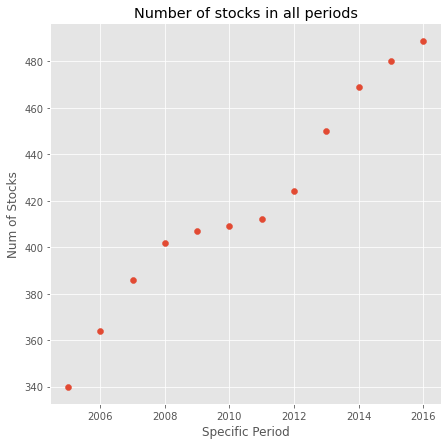

In [10]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(7,7))
dict_summ1 = dict_summ(set_dict1)
#dict_summ2 = dict_summ(set_dict2)
#dict_summ3 = dict_summ(set_dict3)
#fig, ax = plt.subplots()
bins = np.linspace(330, 505,30)
plt.scatter(list(set_dict1.keys()),dict_summ1['num_stocks'])
#plt.hist(dict_summ2['num_stocks'],bins, label= "valid")
#plt.hist(dict_summ3['num_stocks'],bins, label= "test")
#plt.legend(loc='upper left')
plt.xlabel("Specific Period")
plt.ylabel("Num of Stocks")
plt.title("Number of stocks in all periods")
plt.show()